<a href="https://colab.research.google.com/github/sidbardoloye/DSC404F/blob/main/CapstoneProj_SidharthaSarat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Capstone project - Sidhartha Sarat Bardoloye
# Dated: 18th March 2023
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# clean the words in the file 
def cleanWord(origWord):
  #remove punctuations # 
  origWord=origWord.translate(str.maketrans('', '', string.punctuation))
  #convert to lower case 
  origWord=origWord.lower()
  return (origWord)
def printFormat(printText):
  print()
  print("-----------------------------------------------")
  print(printText)
  print("-----------------------------------------------")

# define a few stop words to be ignored
wordsToBeIgnored=['a','an','is','the','of','etc','as','to','on','he','they','she'
,'that','but','by','do','for','it','its','his','her','their','not','if','into','in','etc.'
,'be','or','and','their','nor','has','had','have','we','us','me']

# Read the file in question
file=open('capstoneInput.txt')

# initialising a np array to hold all words 
cleanWordList=np.array([])
# iterating through the lines in the file 
for line in file:
  line=cleanWord(line)
  words=line.split()
  # print (words)
  # creating a word list as a numpy array
  cleanWordList=np.append(cleanWordList,words) 

# Process the numpy array for rest of the things 

# create a new array after removing the stop words from cleanWordList
tmpResult = ~np.isin(cleanWordList,wordsToBeIgnored) # this holds a negated boolean array. 
# The words which are there in both will be False (due to negation) i.e., stop words
cleanWordList_NoStpWrds=cleanWordList[tmpResult] # this contains the results after removal of stop words
totalCleanWords=cleanWordList_NoStpWrds.size # storing the total clean words minus the stop words

wordCountDict=dict()
for word in cleanWordList_NoStpWrds:
  if word in wordCountDict:
    wordCountDict[word]=wordCountDict[word]+1
  else:
    wordCountDict[word]=1

# creating a pandas dataframe with 3 columns - "Words","frequency","prob_occ"(probability of occurence of the word)
df_wordfreq=pd.DataFrame(columns=['words','frequency','prob_occ'])
for word,freq in wordCountDict.items():
  rowTobeInserted={'words':word,'frequency':freq,'prob_occ':freq/totalCleanWords}
  df_wordfreq.loc[len(df_wordfreq)]=rowTobeInserted

# printing the total counts 
print ("total non unique words:",cleanWordList.size) 
print ("total non unique words without stop words:",totalCleanWords) 
printFormat("The 10 most frequent words in the file")
print (df_wordfreq.sort_values(by=['frequency'],ascending=False).head(10))
printFormat("The 10 least frequent words in the file")
print (df_wordfreq.sort_values(by=['frequency'],ascending=False).tail(10))

# Writing the "words","frequency","prob_occ" into a CSV
df_wordfreq.to_csv('word_freq.csv')
# printing the overall results
printFormat("display words,frequency & occurence probability")
print(df_wordfreq)


total non unique words: 1946
total non unique words without stop words: 1345

-----------------------------------------------
The 10 most frequent words in the file
-----------------------------------------------
          words  frequency  prob_occ
1      learning         60  0.044610
0       machine         42  0.031227
11         data         26  0.019331
146        from         17  0.012639
132        with         16  0.011896
21   algorithms         15  0.011152
366          ai         12  0.008922
8       methods         12  0.008922
112         can         12  0.008922
3         field         11  0.008178

-----------------------------------------------
The 10 least frequent words in the file
-----------------------------------------------
          words  frequency  prob_occ
306      widely          1  0.000743
305    mitchell          1  0.000743
304           m          1  0.000743
303         tom          1  0.000743
302  terminal18          1  0.000743
301     symbols      

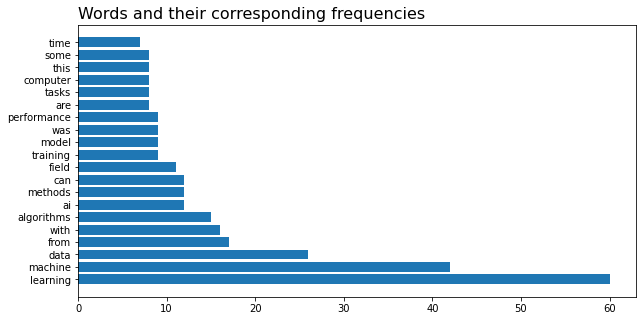

In [44]:
# Plotting the bar graph showing words and frequency 
wrds=list(df_wordfreq.sort_values(by=['frequency'],ascending=False).head(20)["words"])
cnts=list(df_wordfreq.sort_values(by=['frequency'],ascending=False).head(20)["frequency"])

# setting the figure size
fig=plt.figure(figsize = (10, 5))
plt.barh(wrds, cnts)

# Add Plot Title
plt.title('Words and their corresponding frequencies',
             loc ='left',fontsize = 16)
plt.show()

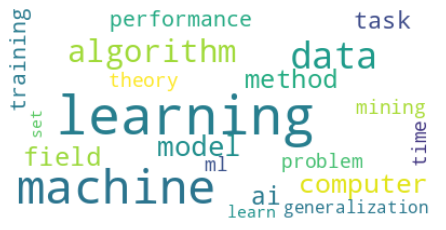

In [41]:
# Word Cloud for the most frequent words 
text = " ".join(wrds for wrds in cleanWordList_NoStpWrds)
wordcloud = WordCloud(collocations = False,max_font_size=50, max_words=20, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [57]:
# How can you use this data?
ans1="How can you use this data? "
ans2="Answer: This data can be used for various purposes such as text mining. "
ans3="For example: If I want to know the most frequently found skills from a bunch of resumes "
printFormat(ans1+'\n'+ans2+'\n'+ans3)
# Think of scenarios where this is applicable
ans1="Applicable Scenarios "
ans2="Analysis of social media feeds for a set of some words. "
ans3="For example: The more often a celebrity is mentioned, that celebrity is popular negative or positively"
ans4="Analysis of tweets with some tags to understand words mentioned often using the tag like climate change."
printFormat(ans1+'\n'+ans2+'\n'+ans3+'\n'+ans4)
# How is this related to Machine Learning?
ans1="Applicability to machine learning "
ans2="Word frequency may be the stepping stone for further machine learning analysis"
ans3="For example: We created cleaned data in the steps above and also generated the frequencies alongside probability of occurence"
ans4="This information may be used in NLP"
printFormat(ans1+'\n'+ans2+'\n'+ans3+'\n'+ans4)



-----------------------------------------------
How can you use this data? 
Answer: This data can be used for various purposes such as text mining. 
For example: If I want to know the most frequently found skills from a bunch of resumes 
-----------------------------------------------

-----------------------------------------------
Applicable Scenarios 
Analysis of social media feeds for a set of some words. 
For example: The more often a celebrity is mentioned, that celebrity is popular negative or positively
Analysis of tweets with some tags to understand words mentioned often using the tag like climate change.
-----------------------------------------------

-----------------------------------------------
Applicability to machine learning 
Word frequency may be the stepping stone for further machine learning analysis
For example: We created cleaned data in the steps above and also generated the frequencies alongside probability of occurence
This information may be used in NLP
----